In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
noise = 10 * np.random.rand(100)
x = np.linspace(0, 10, 100)
# y = 2 * x - 5 + noise
a, b = 2, -5

def f(a, b):
  return a * x + b + noise

y = f(a, b)

In [28]:
x.shape, y.shape

((100,), (100,))

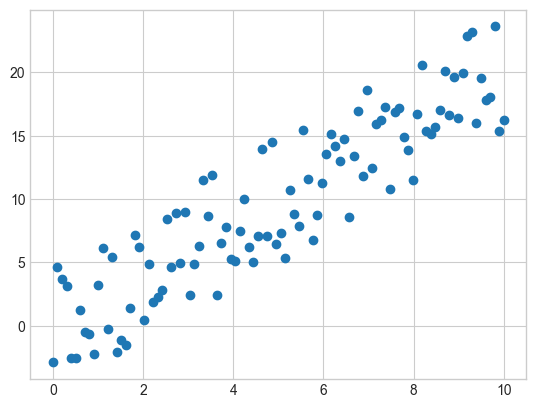

In [29]:
plt.scatter(x, y)

In [30]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
model

LinearRegression()

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(x[:, np.newaxis], y)
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [32]:
new_x = np.linspace(0, 10, 100)
new_y = model.predict(new_x.reshape(-1, 1))

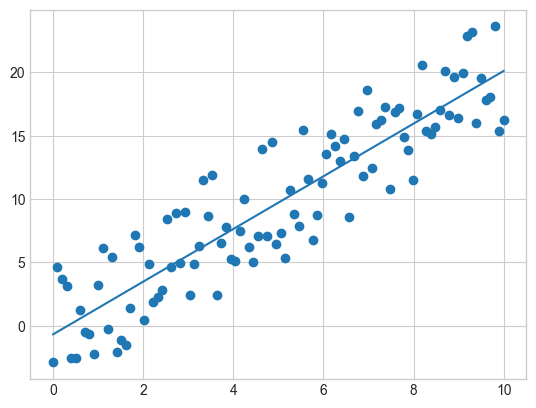

In [33]:
plt.scatter(x, y)
plt.plot(new_x, new_y)

In [34]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'g

In [36]:
model.coef_[0], model.intercept_

(np.float64(2.081227828584082), np.float64(-0.6906423319945016))

In [37]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
X.shape

(100, 3)

In [38]:
y = 0.5 + np.dot(X, [1.5, -2., 1.])
y.shape

(100,)

In [39]:
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[ 1.5 -2.   1. ]
0.5000000000000033


In [51]:
# 앞으로 사용하게 될 것
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [48]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
features = PolynomialFeatures(degree=3, include_bias=False)
features

PolynomialFeatures(degree=3, include_bias=False)

In [49]:
features.fit(x.reshape(-1, 1))

PolynomialFeatures(degree=3, include_bias=False)

In [50]:
features.transform(x.reshape(-1, 1))

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [52]:
model = LinearRegression()

In [53]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
x.shape, y.shape

((50,), (50,))

In [54]:
features = PolynomialFeatures(degree=7, include_bias=False)
features.fit(x.reshape(-1, 1), y)

PolynomialFeatures(degree=7, include_bias=False)

In [56]:
transformed_x = features.transform(x.reshape(-1, 1))
transformed_x.shape

(50, 7)

In [57]:
model.fit(transformed_x, y)

LinearRegression()

In [58]:
model.coef_, model.intercept_

(array([ 3.31250195e-01,  1.28845778e+00, -1.06474496e+00,  2.90659230e-01,
        -3.57011703e-02,  2.01614685e-03, -4.20513337e-05]),
 np.float64(0.02847262424530206))

In [70]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())

In [71]:
poly_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [72]:
new_x = np.linspace(0, 10, 100)
new_y = poly_model.predict(new_x.reshape(-1, 1))

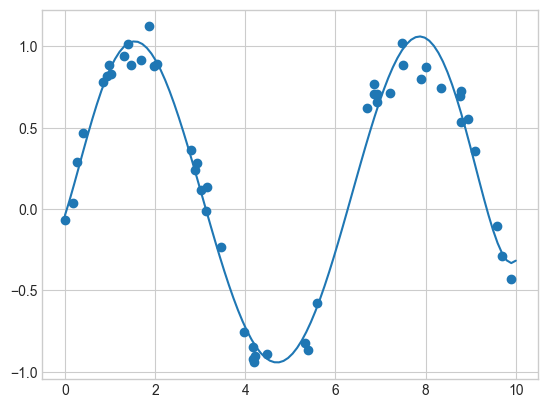

In [73]:
plt.scatter(x, y)
plt.plot(new_x, new_y)